<a href="https://colab.research.google.com/github/ebunsoph25/NOTEBOOK-PROJECT/blob/main/Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import nercessary libraraies
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('credit_score.csv')
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1753,0,10,owner,60,37,married,yes,fixed,90,118.0,4500.0,0.0,1200,1296
3242,0,2,owner,36,37,married,no,fixed,60,125.0,2000.0,0.0,450,1490
3588,0,0,owner,24,30,married,no,partime,60,76.0,4500.0,0.0,400,450
761,1,0,parents,48,25,single,no,freelance,45,145.0,7000.0,0.0,1700,2173
3756,0,9,private,48,46,married,no,fixed,45,100.0,37000.0,0.0,800,904


**Data** **Understanding**

In [ ]:
df.shape

(4454, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   int64  
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4420 non-null   float64
 10  assets     4407 non-null   float64
 11  debt       4436 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 487.3+ KB


In [ ]:
# missing values
df.isna().sum().sort_values(ascending=False)

,0
assets,47
income,34
debt,18
home,0
status,0
seniority,0
marital,0
age,0
time,0
records,0


In [ ]:
df.debt.unique()

array([0.000e+00, 2.500e+03, 2.600e+02, 2.000e+03, 5.000e+02,       nan,
       3.300e+03, 3.000e+03, 4.500e+03, 1.000e+03, 1.200e+03, 8.000e+02,
       4.000e+03, 2.140e+04, 1.400e+03, 4.000e+02, 1.500e+03, 9.000e+03,
       1.947e+03, 9.000e+02, 2.000e+02, 1.550e+04, 1.200e+02, 9.600e+01,
       3.700e+03, 7.000e+02, 2.500e+02, 3.500e+03, 3.000e+02, 2.660e+02,
       4.200e+03, 4.800e+02, 1.000e+02, 1.700e+03, 3.600e+03, 1.300e+03,
       6.000e+02, 1.749e+03, 7.500e+02, 1.260e+03, 7.500e+01, 2.800e+03,
       7.200e+02, 3.400e+01, 2.000e+04, 4.500e+02, 1.810e+03, 4.800e+03,
       1.800e+03, 5.000e+01, 2.400e+03, 1.950e+03, 1.978e+03, 2.160e+03,
       1.440e+03, 6.000e+03, 5.000e+03, 1.000e+00, 1.900e+03, 2.900e+03,
       1.728e+03, 3.500e+02, 4.090e+03, 4.350e+02, 7.000e+03, 5.500e+02,
       2.350e+03, 3.900e+03, 1.641e+03, 9.700e+03, 3.800e+03, 5.600e+02,
       9.300e+03, 3.650e+03, 2.050e+03, 1.100e+03, 6.300e+03, 1.980e+02,
       8.500e+02, 5.750e+02, 1.600e+03, 1.620e+03, 

In [ ]:
df.duplicated().sum()

np.int64(2)

**Notice**

- missing rows
- duplicate values exist

**Data** **Exploration**

In [ ]:
# target columns
df.status.value_counts()

,count
status,
0,3200
1,1254


<Axes: xlabel='status'>

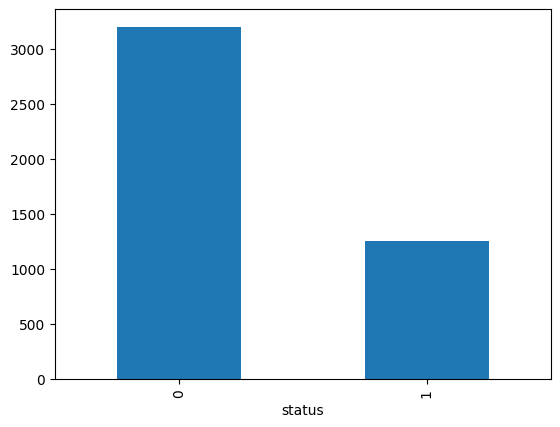

In [ ]:
df.status.value_counts().plot(kind='bar')


- Tareget column is not balanced,there is need for balancing it

**Data** **Preparation**

In [ ]:
x = df.drop('status', axis=1)
y = df['status']

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

**Data** **Preprocessing**

In [ ]:
# separate into cat and num cols
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()


In [ ]:
cat_cols

['home', 'marital', 'records', 'job']

In [ ]:
df.home.unique()

array(['rent', 'owner', 'parents', 'private', 'other', 'ignore', 'unk'],
      dtype=object)

In [ ]:
num_cols

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

**Encoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
encoder = OneHotEncoder(sparse_output=False).fit(df[cat_cols])

In [ ]:
encoder

OneHotEncoder(sparse_output=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [ ]:
encoded_cols

['home_ignore',
 'home_other',
 'home_owner',
 'home_parents',
 'home_private',
 'home_rent',
 'home_unk',
 'marital_divorced',
 'marital_married',
 'marital_separated',
 'marital_single',
 'marital_unk',
 'marital_widow',
 'records_no',
 'records_yes',
 'job_fixed',
 'job_freelance',
 'job_others',
 'job_partime',
 'job_unk']

In [ ]:
x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
x_test[encoded_cols] = encoder.transform(x_test[cat_cols])


In [ ]:
x_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,...,marital_single,marital_unk,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
478,15,owner,48,34,separated,no,freelance,45,0.0,5000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39,30,owner,60,64,married,no,fixed,45,120.0,14000.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2449,2,parents,60,23,single,no,fixed,35,106.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3633,13,owner,48,45,married,no,fixed,45,106.0,4000.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2782,2,owner,60,31,married,no,fixed,60,306.0,4000.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,5,owner,60,25,single,no,freelance,35,250.0,14000.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3476,15,parents,60,42,married,no,freelance,60,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3842,14,rent,60,38,married,no,fixed,71,108.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4401,12,rent,36,36,married,yes,fixed,74,140.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Scaling the numerical columns
scaler = StandardScaler()

In [ ]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols]= scaler.transform(x_test[num_cols])


In [ ]:
x_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,...,marital_single,marital_unk,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
478,0.847911,owner,0.10246,-0.276942,separated,no,freelance,-0.542730,-1.525045,-0.035818,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39,2.679329,owner,0.92191,2.474972,married,no,fixed,-0.542730,-0.119758,0.711326,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2449,-0.739318,parents,0.92191,-1.285977,single,no,fixed,-1.056313,-0.283708,-0.450898,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3633,0.603722,owner,0.10246,0.732093,married,no,fixed,-0.542730,-0.283708,-0.118834,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2782,-0.739318,owner,0.92191,-0.552134,married,no,fixed,0.227646,2.058437,-0.118834,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,-0.373034,owner,0.92191,-1.102516,single,no,freelance,-1.056313,1.402636,0.711326,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3476,0.847911,parents,0.92191,0.456902,married,no,freelance,0.227646,-1.525045,-0.450898,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3842,0.725816,rent,0.92191,0.089980,married,no,fixed,0.792588,-0.260287,-0.450898,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4401,0.481627,rent,-0.71699,-0.093481,married,yes,fixed,0.946663,0.114456,-0.450898,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# combine
train_processed = x_train[num_cols+encoded_cols]
test_processed = x_test[num_cols+encoded_cols]


In [ ]:
train_processed

,seniority,time,age,expenses,income,assets,debt,amount,price,home_ignore,...,marital_single,marital_unk,marital_widow,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
478,0.847911,0.10246,-0.276942,-0.542730,-1.525045,-0.035818,-0.29364,-0.286525,-0.409575,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
39,2.679329,0.92191,2.474972,-0.542730,-0.119758,0.711326,-0.29364,0.186537,-0.249375,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2449,-0.739318,0.92191,-1.285977,-1.056313,-0.283708,-0.450898,-0.29364,-0.454725,-0.565110,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3633,0.603722,0.10246,0.732093,-0.542730,-0.283708,-0.118834,-0.29364,-1.337775,0.240559,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2782,-0.739318,0.92191,-0.552134,0.227646,2.058437,-0.118834,-0.29364,-0.076275,0.987125,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,-0.373034,0.92191,-1.102516,-1.056313,1.402636,0.711326,-0.29364,0.764725,1.033785,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3476,0.847911,0.92191,0.456902,0.227646,-1.525045,-0.450898,-0.29364,0.133975,-0.560444,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3842,0.725816,0.92191,0.089980,0.792588,-0.260287,-0.450898,-0.29364,0.764725,0.361876,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4401,0.481627,-0.71699,-0.093481,0.946663,0.114456,-0.450898,-0.29364,0.764725,0.411647,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_processed.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'home_ignore', 'home_other', 'home_owner',
       'home_parents', 'home_private', 'home_rent', 'home_unk',
       'marital_divorced', 'marital_married', 'marital_separated',
       'marital_single', 'marital_unk', 'marital_widow', 'records_no',
       'records_yes', 'job_fixed', 'job_freelance', 'job_others',
       'job_partime', 'job_unk'],
      dtype='object')

In [ ]:
['records', 'job', 'assests']

['records', 'job', 'assests']

In [ ]:
df['records'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['job'].unique()


array(['freelance', 'fixed', 'partime', 'unk', 'others'], dtype=object)

In [ ]:
df['records'].unique()


array(['no', 'yes'], dtype=object)

In [ ]:
def risk(client):
  if client['records']=='yes':
     if client['job']=='pertime':
        return 'Defaulter'
     else:
        return 'Okay'
  else:
    if client['assets'] > 6000:
        return 'Okay'
    else:
        return 'Defaulter'

In [ ]:
x = df.iloc[10]

In [ ]:
x

,10
status,0
seniority,6
home,owner
time,48
age,34
marital,married
records,no
job,freelance
expenses,60
income,125.0


In [ ]:
risk(x)

'Defaulter'

# Building the decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(train_processed, y_train)

CPU times: user 38.2 ms, sys: 902 µs, total: 39.1 ms
Wall time: 39 ms


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_pred = model.predict(train_processed)
train_score = accuracy_score(train_pred, y_train)

# test
test_pred = model.predict(test_processed)
test_score = accuracy_score(test_pred, y_test)


In [ ]:
train_score, test_score

(0.9997193376368229, 0.7081930415263749)

In [ ]:
train_pred = model.predict(train_processed)

In [ ]:
train_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
y_train

,status
478,0
39,0
2449,0
3633,0
2782,0
...,...
663,0
3476,0
3842,1
4401,1


In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
import matplotlib.pyplot as plt


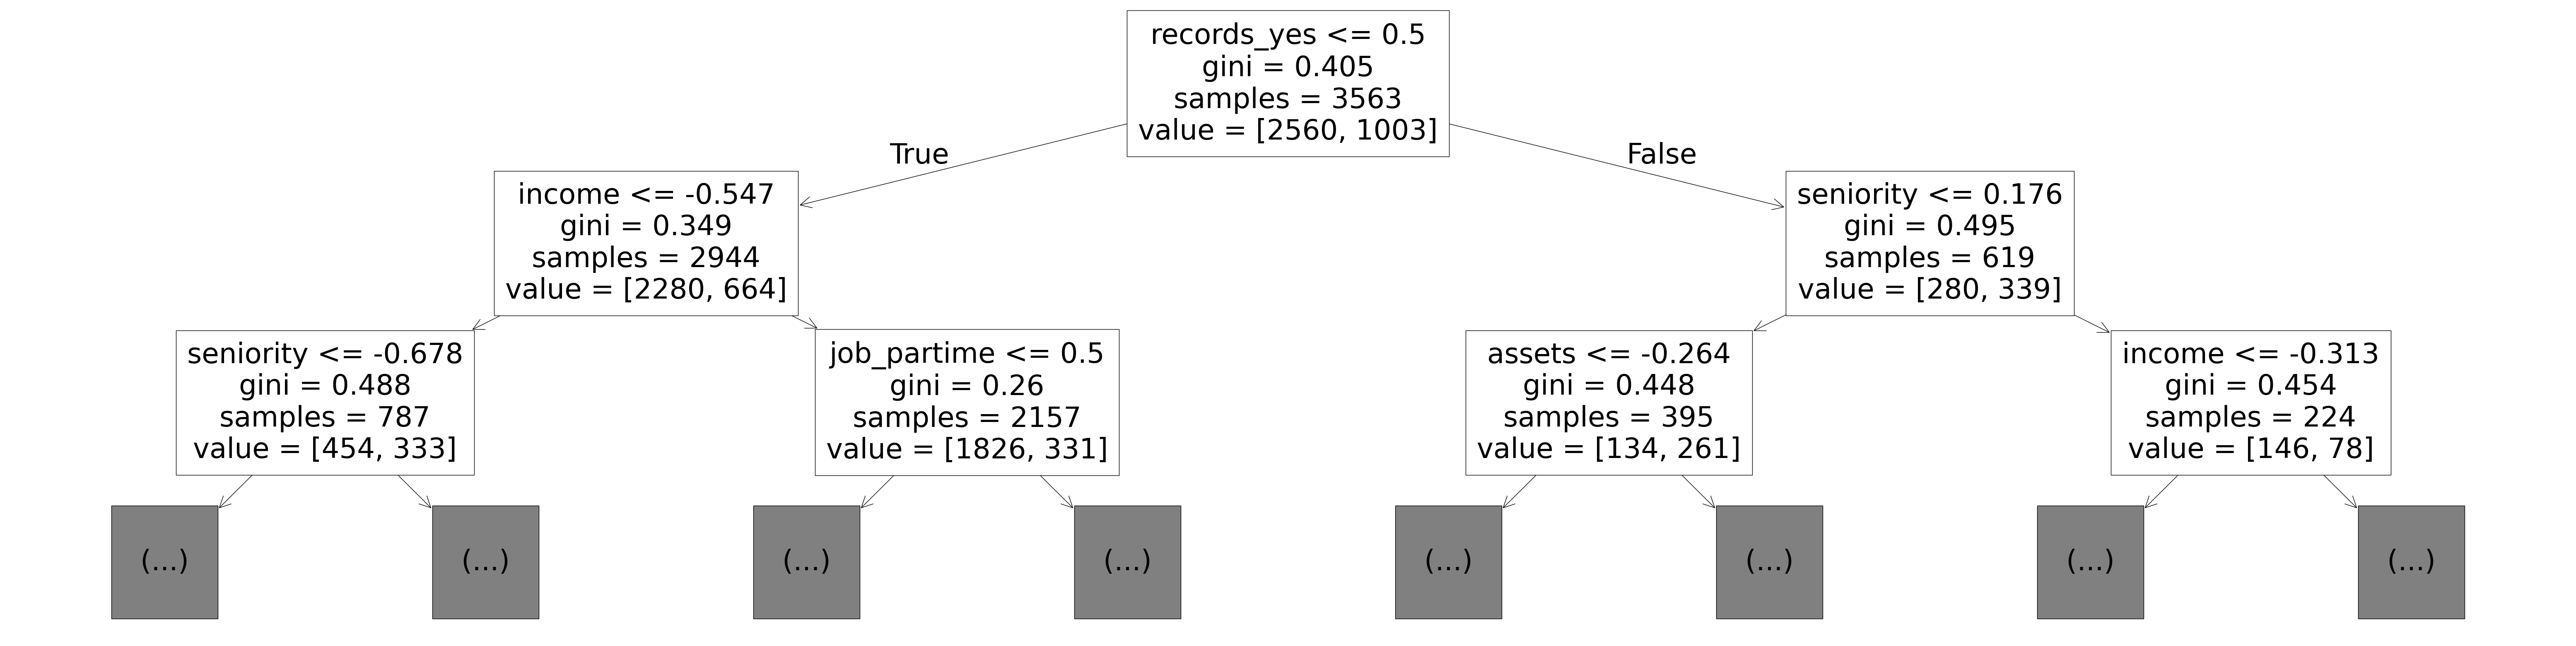

In [ ]:
plt.figure(figsize=(80,20))

plot_tree(model, feature_names=train_processed.columns.tolist(),max_depth=2);

In [ ]:
model.tree_.max_depth

20